### Neural Network (Multi Layer Perceptron )

1. FeedForward to predict output
2. Backpropagation to train the network to adjust weights with the help of error function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(10)

#### XOR Problem. Nonlinearity
<b>Perceptron or other linear classifier can't solve XOR problem. So, we need to devise new strategy. Here the Neural Network comes as rescue.

In [2]:
X=np.array([ [0,0],[0,1], [1,0], [1,1] ])
y=np.array([0,1,1,0])
print(X)
print(y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[0 1 1 0]


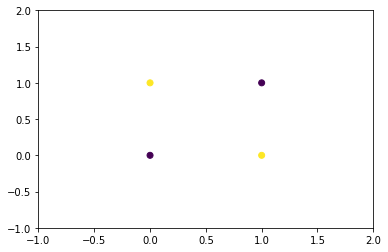

In [3]:
plt.scatter(X[:,0],X[:,1],marker='o', c=y) 
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.show()

### Neural Network with one hidden layer
<img src='imgs/myann.png'>

#### Derivative of sigmoid
$$
\begin{equation}
\sigma(x)=\frac{1}{1+e^{-x} }  \\
{\bf \frac{d\sigma(x)}{dx}=\frac{ d(1+e^{-x} )^{-1} }{dx} }\\
=-1(1+e^{-x} )^{-2}  \frac{de^{-x}}{dx}=-1(1+e^{-x} )^{-2} e^{-x} (-1)=(1+e^{-x} )^{-2} e^{-x}=\frac{e^{-x}}{(1+e^{-x} )^2} =\frac{e^{-x}}{(1+e^{-x} )(1+e^{-x} )}=  \frac{ 1}{1+e^{-x}}  \frac{ e^{-x}+1-1}{1+e^{-x}}
=\frac{1}{1+e^{-x}  } (\frac{(1+e^{-x})}{(1+e^{-x} }-   \frac{1}{1+e^{-x}} )=\frac{1}{1+e^{-x}} (1-   \frac{1}{1+e^{-x} })
\\= {\bf \sigma(x)(1-\sigma(x)) }\\
so, {\bf \frac{d\sigma(x)}{dx}= y(1-y)} ,where\space {\bf y=\sigma(x) }
\end{equation}
$$

### Feed Forward
$$
\begin{equation}
z0=W[0][0].X[0]+W[0][1].X[1]+W[0][2].X[2] \\
h[1]=sigmoid(z0) \\
z1=W[1][0].X[0]+W[1][1].X[1]+W[1][2].X[2] \\
h[2]=sigmoid(z1) \\
z2=W2[0].h[0] +W2[1].h[1] +W2[2].h[2]   \\
y=sigmoid(z2)
\end{equation}
$$

#### Neural Network Details
<img src='imgs/myann2.png'>

### Backpropagation

#### W2 Gradient
$$
\begin{equation}
Error=(y-y\_actual )^2  =( \space {\bf sigmoid(z2)}-y\_actual )^2 
=( \space sigmoid {\bf ( \space W2[0].h[0] +W2[1].h[1] +W2[2].h[2] \space) }  -y\_actual )^2 \\
Using \space chain \space rule,
{\bf \frac{\partial Error}{\partial W2[0]}=\frac{\partial Error}{\partial y} * \frac{\partial y}{\partial z2}* \frac{\partial z2}{\partial W2[0]} }
\end{equation}
$$

Now,
$$
\begin{equation}
\frac{\partial z2}{\partial W2[0]}=h[0] \\
 \frac{\partial y}{\partial z2}=sigmoid\_derivative(z2) ={\bf sigmoid\_derivative(y) }  \quad where \space y=sigmoid(z2)\\
And, \frac{\partial Error}{\partial y}=2(y-y\_actual) \\
{\bf So,}\\
\frac{\partial Error}{\partial W2[{\bf0}]}=2(y-y\_actual)*sigmoid\_derivative(y)*h[{\bf0}] \\
Similarly, \\ 
\frac{\partial Error}{\partial W2[{\bf1}]}=2(y-y\_actual)*sigmoid\_derivative(y)*h[{\bf1}] \\
\frac{\partial Error}{\partial W2[{\bf2}]}=2(y-y\_actual)*sigmoid\_derivative(y)*h[{\bf2}] \\
By \space Combining \space these, \\
{\bf \frac{\partial Error}{\partial W2}=2(y-y\_actual )*sigmoid\_derivative(y)*h }
\end{equation}
$$

#### W1 Gradient for the hidden neurons.
$$
\begin{equation}
Error=(y-y\_actual )^2  
=( {\bf sigmoid(z2)}-y\_actual )^2 
=(sigmoid( \space {\bf W2[0].h[0] +W2[1].h[1] +W2[2].h[2] } \space)-y\_actual )^2 \\
=(sigmoid(W2[0].{\bf 1} +W2[1].{\bf sigmoid(z0)} +W2[2].{\bf sigmoid(z1)})-y\_actual )^2 \\
=(sigmoid(W2[0].1 +W2[1].sigmoid {\bf (W[0][0].X[0]+W[0][1].X[1]+W[0][2].X[2]) } +W2[2].sigmoid({\bf W[1][0].X[0]+W[1][1].X[1]+W[1][2].X[2]) })-y\_actual )^2 \\
Using \space chain \space rule,
{\bf \frac{\partial Error}{\partial W[0][0]}=\frac{\partial Error}{\partial y} * \frac{\partial y}{\partial z2}*\frac{\partial z2}{\partial h[1]}*\frac{\partial h[1]}{\partial z0}*\frac{\partial z0}{\partial W[0][0]} }
\end{equation}
$$

Now,
$$
\begin{equation}
\frac{\partial z0}{\partial W[0][0]}=X[0]\\
\frac{\partial h[1]}{\partial z0}=sigmoid\_derivative(z0)={\bf sigmoid\_derivative(h[1]) }  \quad where \space h[1]=sigmoid(z0)  \\
\frac{\partial z2}{\partial h[1]}=W2[1] \\
\frac{\partial y}{\partial z2}=sigmoid\_derivative(z2)={\bf sigmoid\_derivative(y) } \quad where \space y=sigmoid(z2)\\
\frac{\partial Error}{\partial y}=2(y-y\_actual ) \\
So, \\
\frac{\partial Error}{\partial W[0][0]} =2(y-y\_actual )*sigmoid\_derivative(y)*W2[1]*sigmoid\_derivative(h[1]) *X[0] \\
Similarly, \\
\frac{\partial Error}{\partial W[0][{\bf 1}]}=2(y-y\_actual )*sigmoid\_derivative(y)*W2[1]*sigmoid\_derivative(h[1]) *X[{\bf 1}] \\
\frac{\partial Error}{\partial W[0][{\bf 2}]}=2(y-y\_actual )*sigmoid\_derivative(y)*W2[1]*sigmoid\_derivative(h[1]) *X[{\bf 2}] \\
Combining \space these, \\
for \space the \space first \space neuron, \frac{\partial Error}{\partial W[0]} =2(y-y\_actual )*sigmoid\_derivative(y)*W2[1]*sigmoid\_derivative(h1) *X \\
Similarly, \\for \space the \space second \space neuron,
\frac{\partial Error}{\partial W[{\bf 1}]} =2(y-y\_actual )*sigmoid\_derivative(y)*W2[{\bf 2}]*sigmoid\_derivative(h2) *X
\end{equation}
$$

### Update weights
w2=w2+w2_derivative <br>
w=w+w_derivative

### Codes

In [4]:
def sigmoid(s):
    return 1/(1+np.exp(-s))

def sigmoid_derivative(y):
    return y * (1 - y)

In [5]:
def feed_forward(X, w1, w2):
    z=np.dot( X, w1.T)
    h = sigmoid(z)   
    h = np.column_stack((np.ones(len(h)), h))
    z2=np.dot( h, w2.T)
    output = sigmoid(z2)
    return output, h

In [6]:
#Derivative with respect to w2
def dw2(y,o,h):
    tw2d=0
    for i in range( len(y)):
        w2d=2*(y[i] - o[i])*sigmoid_derivative(o[i])*h[i]
        tw2d+=w2d
    return tw2d

In [7]:
def w1d_for_singleneuron(neuron_i, y,o,W2, h,X):
    sd=0
    for i in range( len(y)):
        d=2*(y[i] - o[i])*sigmoid_derivative(o[i])*W2[neuron_i+1]*sigmoid_derivative(h[i][neuron_i+1])*X[i]
        sd+=d
    return sd
def dw1(y,o,h,W2,X):
    w1dm=[]
    for j in range(hiddenSize):
        w1dd=w1d_for_singleneuron(j, y,o,W2, h,X)
        w1dm.append(w1dd)
    w1dm=np.array(w1dm)
    return w1dm

In [8]:
X = np.array(([0, 0], [0, 1], [1, 0], [1,1]), dtype=float)
y=np.array([0,1,1,0])
X= np.column_stack((np.ones(X.shape[0]), X))
print(X)
print(y)

[[1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]]
[0 1 1 0]


In [9]:
len(y)

4

In [15]:
inputSize = 2
outputSize = 1
hiddenSize = 2
# hiddenSize = 3
w1 = np.random.randn(hiddenSize, inputSize+1)    #1 bias for each hidden neuron
w2 = np.random.randn(outputSize,hiddenSize+1)[0]  #1 bias for each output neuron
print(w1)
print(w2)

[[ 0.36547868  2.86336932  1.25446807]
 [ 0.13955048 -1.53607357  0.60762678]]
[-0.20898056 -0.24021958  0.21192959]


In [13]:
lr=0.1
nepoch=10000
errors=[]
for i in range(nepoch):
    o,h=feed_forward(X,w1,w2)
    w2_d=dw2(y,o,h)
    w1_d=dw1(y,o,h,w2,X)

    w1 +=  lr * w1_d
    w2 += lr * w2_d 
#     w1 +=   w1_d
#     w2 +=  w2_d 
    error=np.mean(np.square(y - o))
    errors.append(error)

o,h=feed_forward(X,w1,w2)
print(o)

[0.02874239 0.96755907 0.9727526  0.02555476]


In [14]:
print(w1)
print(w2)

[[ 3.00419111  5.93471511 -5.86644092]
 [-2.81706786  5.20339847 -5.43320379]]
[ 3.83841425 -8.23903353  8.70811673]


#### This output is close to the original output. So, it correctly classified all the data.

In [15]:
o,h=feed_forward(X,w1,w2)
print(o)

[0.02874239 0.96755907 0.9727526  0.02555476]


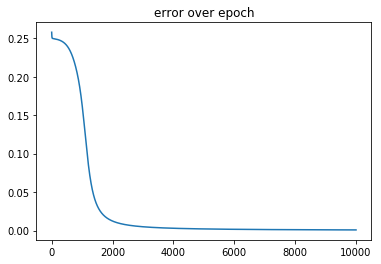

In [16]:
#Plotting the cost
npt=nepoch
plt.plot(errors)
plt.title('error over epoch')
plt.show()

#### Testing Functions

In [17]:
print(w1)
print(w2)

[[ 3.00419111  5.93471511 -5.86644092]
 [-2.81706786  5.20339847 -5.43320379]]
[ 3.83841425 -8.23903353  8.70811673]


In [17]:
#3 hidden.
sw1=[[ 2.7 , 0.8 , 0.7],
 [ 3 , -6 , 6.4],
 [ 3 , 6.6 ,-6.3]]

sw1=[[ 2.1 , 0.7 , 0.7],
 [ 2 , -5 , 6.4],
 [ 2.5 , 6.2 ,-5.8]]


sw1=np.array(sw1)
print(sw1)

sw2=np.array([ 7.5 , 6.5 , -7.8 , -8.0])
print(sw2)

[[ 2.1  0.7  0.7]
 [ 2.  -5.   6.4]
 [ 2.5  6.2 -5.8]]
[ 7.5  6.5 -7.8 -8. ]


In [18]:
w1=sw1
w2=sw2

#### Two Hidden experiment

In [23]:
#two hidden.
w1=[[-2.8  , 6.3 , 6.3],
 [-7.2 , 4.7 , 4.7]]
w1=np.array(w1)
w2=np.array([ -4.5  , 9.6 , -10.2 ])
print(w1)
print(w2)

[[-2.8  6.3  6.3]
 [-7.2  4.7  4.7]]
[ -4.5   9.6 -10.2]


In [13]:
o,h=feed_forward(X,w1,w2)
print(h)
print(o)

[[1.00000000e+00 5.73241759e-02 7.46028834e-04]
 [1.00000000e+00 9.70687769e-01 7.58581800e-02]
 [1.00000000e+00 9.70687769e-01 7.58581800e-02]
 [1.00000000e+00 9.99944551e-01 9.00249511e-01]]
[0.01875618 0.98278906 0.98278906 0.01657612]


In [26]:
# aw1=[[2.7  , 0.8 ,  0.7],
#  [3 , -6 , 6.5],
# [3 ,6.6 , -6.3]]
# a=np.array(aw1)

In [27]:
x=[ [1,0,0], [1,0,1], [1,1,0], [1,1,1]]
x=np.array(x)

In [28]:
h=np.dot(x[2], a)
print(h)

[ 5.7 -5.2  7.2]


In [29]:
sigmoid(h)

array([0.99666519, 0.0054863 , 0.99925397])

In [30]:
aw2=[ 6.40, -8.8, -8.8]
w2=np.array(aw2)

In [31]:
s=np.dot(h,w2)+7.3
print(s)

26.180000000000003


In [32]:
sigmoid(s)

0.9999999999957325

In [33]:
# #two hidden.
# aw1=[[2.7  , 0.8 , 0.7],
#  [3 , -6 , 6.4]]
# aw1=np.array(aw1)
# aw2=np.array([ 7.3, 6, -8.8 ])
# print(aw1)
# print(aw2)

In [24]:
# w1=aw1
# w2=aw2
print(w1)
print(w2)

[[-2.8  6.3  6.3]
 [-7.2  4.7  4.7]]
[ -4.5   9.6 -10.2]


In [25]:
o,h=feed_forward(X,w1,w2)
print(o)
print(h[2])

[0.01875618 0.98278906 0.98278906 0.01657612]
[1.         0.97068777 0.07585818]


#### Calculating derivative with respect to output /hidden neuron weights for a single prediction.

In [46]:
#with respect to output neuron
i=2
k=2*(y[i] - o[i])*sigmoid_derivative(o[i])*h[i]
print(k[0], k[1], k[2])

5.4821679688190675e-05 5.481448887970782e-05 5.020454228994396e-05


In [26]:
tw2d=[]
for i in range( len(y)):
        w2d=2*(y[i] - o[i])*sigmoid_derivative(o[i])*h[i]
        tw2d.append(w2d)

In [27]:
print(tw2d[0])
print(tw2d[1])
print(tw2d[2])
print(tw2d[3])

[-6.90392301e-04 -3.95761697e-05 -5.15052563e-07]
[5.82236734e-04 5.65170077e-04 4.41674190e-05]
[5.82236734e-04 5.65170077e-04 4.41674190e-05]
[-0.00054043 -0.0005404  -0.00048652]


In [28]:
np.sum(tw2d, axis=0)

array([-6.63449802e-05,  5.50367802e-04, -3.98698590e-04])

In [29]:
w2_d=dw2(y,o,h)
print(w2_d)

[-6.63449802e-05  5.50367802e-04 -3.98698590e-04]


In [24]:
print('val=%.7f'%k[2])

val=0.0000025


In [62]:
#with respect to first hidden neuron.
neuron_i=0
hk=2*(y[i] - o[i])*sigmoid_derivative(o[i])*w2[neuron_i+1]*sigmoid_derivative(h[i][neuron_i+1])*X[i]
print(hk)

[0.00430178 0.00430178 0.00430178]


In [34]:
#with respect to second hidden neuron.
neuron_i=0
hk=2*(y[i] - o[i])*sigmoid_derivative(o[i])*w2[neuron_i+1]*sigmoid_derivative(h[i][neuron_i+1])*X[i]
print(hk)

[-2.87656042e-07 -2.87656042e-07 -2.87656042e-07]


In [35]:
w1_d=dw1(y,o,h,w2,X)
print(w1_d)

[[-4.03648432e-05  1.58749743e-04  1.58749743e-04]
 [-3.32405798e-04  7.86775663e-05  7.86775663e-05]]


In [39]:
sd=[]
neuron_i=1
for i in range( len(y)):
    d=2*(y[i] - o[i])*sigmoid_derivative(o[i])*w2[neuron_i+1]*sigmoid_derivative(h[i][neuron_i+1])*X[i]
    sd.append(d)

In [40]:
print(sd[0])
print(sd[1])
print(sd[2])
print(sd[3])

[5.24961686e-06 0.00000000e+00 0.00000000e+00]
[-0.00041633 -0.         -0.00041633]
[-0.00041633 -0.00041633 -0.        ]
[0.00049501 0.00049501 0.00049501]


In [41]:
np.sum(sd, axis=0)

array([-3.32405798e-04,  7.86775663e-05,  7.86775663e-05])

#### Finding average derivative

In [36]:
w2_d=dw2(y,o,h)
w1_d=dw1(y,o,h,w2,X)
print(w2_d)
print(w1_d)

[-0.02340595 -0.02234759 -0.00113384]
[[0.00899473 0.00464249 0.00463615]
 [0.00986782 0.004713   0.00475196]]


In [37]:
#Update.
w2=w2+w2_d
print(w2)

[ 6.37659405 -8.82234759 -8.80113384]


In [38]:
print("Loss: \n" + str(np.mean(np.square(y - o))) ) # mean sum squared loss

Loss: 
0.2531773262082668


#### Function Check

In [30]:
sigmoid(7.46028834e-04)

0.5001865071998498

In [31]:
z=np.dot(X[0], w1[0])
print(z)
sigmoid(z)

2.1


0.8909031788043871

In [32]:
z1=np.dot(X[0], w1[1])
print(z1)
sigmoid(z1)

2.0


0.8807970779778823

In [33]:
nh=np.array([1, 0.057324175898868755, 0.000746028833836697])

In [34]:
z2=np.dot(nh, w2)
print(z2)
sigmoid(z2)

ValueError: shapes (3,) and (4,) not aligned: 3 (dim 0) != 4 (dim 0)

In [35]:
od=dw2(y,o,h)
print(od)

[-0.17919174 -0.16522433 -0.16395724 -0.16728107]


In [36]:
print(y[0], o[0], h[0])

0 0.2743862415104851 [1.         0.89090318 0.88079708 0.92414182]


In [37]:
2*(y[0] - o[0])*sigmoid_derivative(o[0])*h[0][2]

-0.09623566051069744

In [38]:
6.90392301e-04

0.000690392301

In [39]:
3.95761697e-05

3.95761697e-05

In [40]:
i=0
neuron_i=0
d=2*(y[i] - o[i])*sigmoid_derivative(o[i])*w2[neuron_i+1]*sigmoid_derivative(h[i][neuron_i+1])*X[i]
print(d)

[-0.06727195 -0.         -0.        ]


#### Plotting

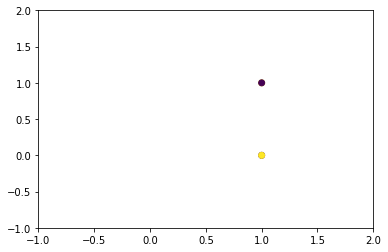

In [41]:
plt.scatter(X[:,0],X[:,1],marker='o', c=y) 
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.show()

In [42]:
#calculating decision boundary line.
#from ax+by+c=0, setting x=0 and y=0 we get.
px=[0, -w1[0][0]/w1[0][1] ] #x=0, and x=value for y=0
px2=[ -w1[0][0]/w1[0][2], 0 ] #y= value for x=0, 0

px2=[0, -w1[1][0]/w1[1][1] ] #x=0, and x=value for y=0
px22=[ -w1[1][0]/w1[1][2], 0 ] #y= value for x=0, 0

px3=[0, -w2[0]/w2[1] ] #x=0, and x=value for y=0
px32=[ -w2[0]/w2[2], 0 ] #y= value for x=0, 0

print(px, px2)
print(px2, px22)
print(px3, px32)

[0, -3.0000000000000004] [0, 0.4]
[0, 0.4] [-0.3125, 0]
[0, -1.1556539072495204] [0.9192425372677615, 0]


In [43]:
# px=np.array(px)
# px*s

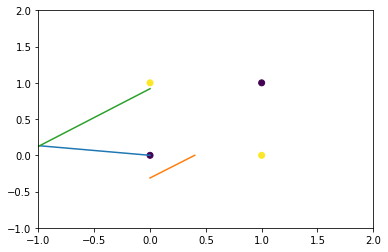

In [44]:
s=1
bs=5

px=np.array(px)
px2=np.array(px2)
px2=np.array(px2)
px22=np.array(px22)

# px3=np.array(px3)

plt.plot(px*s, px2*s)
plt.plot(px2*s, px22*s ) 
plt.plot(px3*s, px32*s )
plt.scatter(X[:,1],X[:,2],marker='o', c=y) 
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.show()